<a href="https://colab.research.google.com/github/ethlynsaltzman/Project-2/blob/main/ESaltzmanPythoncapstoneproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#in this analysis I decided to look the relationship between SWD status and graduation rate"
#Q1: Have graduation rates have changed for students with and without disabilities.
#Q2: Has the gap between graduation rates of students with and without disabilities increased

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


grad = pd.read_csv('/content/2017_-_2018_Graduation_Outcomes_School_20240102.csv')
pd.options.display.max_rows = 200
grad.head(100)


<ipython-input-1-3420bc711cad>:11: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  grad = pd.read_csv('/content/2017_-_2018_Graduation_Outcomes_School_20240102.csv')


,DBN,School Name,Demographic Category,Demographic Variable,Cohort Year,Cohort,Total Cohort #,Total Grads #,Total Grads % of cohort,Total Regents #,...,Regents w/o Advanced #,Regents w/o Advanced % of cohort,Regents w/o Advanced % of grads,Local #,Local % of cohort,Local % of grads,Still Enrolled #,Still Enrolled % of cohort,Dropped Out #,Dropped Out % of cohort
0,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,"2,014",4 year August,29,28,96.6,25,...,25,86.2,89.3,3,10.3,10.7,0,0.0,1,3.4
1,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,"2,013",4 year August,36,25,69.4,23,...,23,63.9,92.0,2,5.6,8.0,3,8.3,7,19.4
2,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,"2,012",4 year August,44,24,54.5,20,...,19,43.2,79.2,4,9.1,16.7,10,22.7,10,22.7
3,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,"2,011",4 year August,73,46,63.0,41,...,41,56.2,89.1,5,6.8,10.9,18,24.7,7,9.6
4,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,"2,010",4 year August,61,26,42.6,26,...,25,41.0,96.2,0,0.0,0.0,18,29.5,17,27.9
5,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,"2,009",4 year August,85,49,57.6,44,...,44,51.8,89.8,5,5.9,10.2,28,32.9,8,9.4
6,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,"2,008",4 year August,70,36,51.4,30,...,30,42.9,83.3,6,8.6,16.7,18,25.7,13,18.6
7,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,"2,007",4 year August,77,45,58.4,29,...,29,37.7,64.4,16,20.8,35.6,22,28.6,5,6.5
8,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,"2,006",4 year August,78,44,56.4,37,...,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1
9,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,"2,005",4 year August,64,44,68.8,27,...,27,42.2,61.4,17,26.6,38.6,8,12.5,9,14.1


In [2]:
grad.shape

(508193, 25)

In [3]:
grad.isnull().values.any()

False

In [4]:
grad.dtypes


DBN                                 object
School Name                         object
Demographic Category                object
Demographic Variable                object
Cohort Year                         object
Cohort                              object
Total Cohort #                      object
Total Grads #                       object
Total Grads % of cohort             object
Total Regents #                     object
Total Regents % of cohort           object
Total Regents % of grads            object
Advanced Regents #                  object
Advanced Regents % of cohort        object
Advanced Regents % of grads         object
Regents w/o Advanced #              object
Regents w/o Advanced % of cohort    object
Regents w/o Advanced % of grads     object
Local #                             object
Local % of cohort                   object
Local % of grads                    object
Still Enrolled #                    object
Still Enrolled % of cohort          object
Dropped Out

In [5]:
#Cleaning:  Checking data types and removialues, s  and extra commas
grad['Total Cohort #'] = grad['Total Cohort #'].astype(str)
grad['Total Grads % of cohort'] = grad['Total Grads % of cohort'].astype(str)
grad = grad.drop(grad[grad['Total Grads % of cohort'] == 's'].index)
grad = grad.drop(grad[grad['Total Cohort #'] == 's'].index)
grad['Cohort Year']= grad['Cohort Year'].str.replace(',','')
grad['Total Cohort #']= grad['Total Cohort #'].str.replace(',','')
grad.shape

(352392, 25)

In [6]:
# fixing data types
grad['Cohort'] = grad['Cohort'].astype(str)
grad['Demographic Variable'] = grad['Demographic Variable'].astype(str)
grad['Total Cohort #']= grad['Total Cohort #'].apply(pd.to_numeric)
grad['Total Grads % of cohort']= grad['Total Grads % of cohort'].apply(pd.to_numeric)
grad['Cohort Year']= grad['Cohort Year'].apply(pd.to_numeric)

grad.shape





(352392, 25)

In [7]:
null = grad.isnull().any(axis=1)
nullrows= grad[null]
nullrows


,DBN,School Name,Demographic Category,Demographic Variable,Cohort Year,Cohort,Total Cohort #,Total Grads #,Total Grads % of cohort,Total Regents #,...,Regents w/o Advanced #,Regents w/o Advanced % of cohort,Regents w/o Advanced % of grads,Local #,Local % of cohort,Local % of grads,Still Enrolled #,Still Enrolled % of cohort,Dropped Out #,Dropped Out % of cohort


In [8]:
grad.loc[grad['Total Grads % of cohort']== 's']

,DBN,School Name,Demographic Category,Demographic Variable,Cohort Year,Cohort,Total Cohort #,Total Grads #,Total Grads % of cohort,Total Regents #,...,Regents w/o Advanced #,Regents w/o Advanced % of cohort,Regents w/o Advanced % of grads,Local #,Local % of cohort,Local % of grads,Still Enrolled #,Still Enrolled % of cohort,Dropped Out #,Dropped Out % of cohort


In [9]:
grad.shape


(352392, 25)

In [10]:
grad.dtypes

DBN                                  object
School Name                          object
Demographic Category                 object
Demographic Variable                 object
Cohort Year                           int64
Cohort                               object
Total Cohort #                        int64
Total Grads #                        object
Total Grads % of cohort             float64
Total Regents #                      object
Total Regents % of cohort            object
Total Regents % of grads             object
Advanced Regents #                   object
Advanced Regents % of cohort         object
Advanced Regents % of grads          object
Regents w/o Advanced #               object
Regents w/o Advanced % of cohort     object
Regents w/o Advanced % of grads      object
Local #                              object
Local % of cohort                    object
Local % of grads                     object
Still Enrolled #                     object
Still Enrolled % of cohort      

In [11]:
grad['Demographic Variable'].unique()

array(['All Students', 'Current ELL', 'ELL', 'Ever ELL', 'Former ELL',
       'Never ELL', 'Not ELL', 'Asian', 'Black', 'Hispanic', 'Female',
       'Male', 'Female Asian', 'Female Black', 'Female Hispanic',
       'Male Asian', 'Male Black', 'Male Hispanic', 'Econ Disadv',
       'Not Econ Disadv', 'Not SWD', 'SWD', 'Multi-Racial', 'White',
       'Female Multi-Racial', 'Male White', 'Native American',
       'Female Native American', 'Female White', 'Male Multi-Racial',
       'Male Native American'], dtype=object)

In [48]:
#reduced rows to only SWD vs Not SWD
df = grad[grad['Demographic Variable'].str.contains('SWD')].copy()
df = df[['Cohort Year','Cohort','Demographic Variable','Total Grads % of cohort','Total Cohort #']].copy()
df["Class Size"] = df['Total Cohort #']
df

,Cohort Year,Cohort,Demographic Variable,Total Grads % of cohort,Total Cohort #,Class Size
1052,2014,4 year August,Not SWD,100.0,21,21
1053,2013,4 year August,Not SWD,79.2,24,24
1054,2012,4 year August,Not SWD,61.3,31,31
1055,2011,4 year August,Not SWD,73.6,53,53
1056,2010,4 year August,Not SWD,53.2,47,47
...,...,...,...,...,...,...
508188,2005,6 year June,SWD,10.3,29,29
508189,2004,6 year June,SWD,15.8,19,19
508190,2003,6 year June,SWD,13.3,15,15
508191,2002,6 year June,SWD,35.3,17,17


In [49]:
df['Cohort'].unique()

array(['4 year August', '4 year June', '5 year August', '5 year June',
       '6 year June'], dtype=object)

In [50]:
#dropped to have just two categories 4 year and 6 year graduatipon rates
df = df.drop(df[df.Cohort.isin(['5 year June','4 year August','5 year August'])].index).copy()


In [51]:
# just used single school to see what data was appearing for each school
df.loc[grad['Cohort Year']== 2012].loc[grad['School Name']== 'ORCHARD COLLEGIATE ACADEMY']

,Cohort Year,Cohort,Demographic Variable,Total Grads % of cohort,Total Cohort #,Class Size
1064,2012,4 year June,Not SWD,58.1,31,31
1094,2012,6 year June,Not SWD,72.4,29,29
1116,2012,4 year June,SWD,38.5,13,13
1145,2012,6 year June,SWD,58.3,12,12


In [52]:
# some decriptives looking ta mean size of cohorts and graduation rates for all years s
df.describe()

,Cohort Year,Total Grads % of cohort,Total Cohort #,Class Size
count,16968.000000,16968.000000,16968.000000,16968.000000
mean,2007.988685,59.731636,101.753182,101.753182
std,3.618660,25.704943,166.271192,166.271192
min,2001.000000,0.000000,5.000000,5.000000
25%,2005.000000,41.400000,17.000000,17.000000
50%,2008.000000,62.900000,57.000000,57.000000
75%,2011.000000,80.300000,94.000000,94.000000
max,2014.000000,100.000000,1348.000000,1348.000000


In [53]:
# looking at graduation rates rates and total size of cohort for all years both 4 year and 6 year graduation rate


Ch = df.groupby(['Cohort Year','Cohort','Demographic Variable'], as_index=False).agg({'Total Grads % of cohort':'mean','Class Size':'mean','Total Cohort #':'sum'})
Ch


,Cohort Year,Cohort,Demographic Variable,Total Grads % of cohort,Class Size,Total Cohort #
0,2001,4 year June,Not SWD,54.016129,272.661290,50715
1,2001,4 year June,SWD,26.367816,40.994253,7133
2,2001,6 year June,Not SWD,70.058065,272.661290,50715
3,2001,6 year June,SWD,34.497701,40.994253,7133
4,2002,4 year June,Not SWD,55.383902,268.068293,54954
5,2002,4 year June,SWD,27.950549,28.098901,5114
6,2002,6 year June,Not SWD,70.648780,268.068293,54954
7,2002,6 year June,SWD,40.362637,28.098901,5114
8,2003,4 year June,Not SWD,58.665417,225.995833,54239
9,2003,4 year June,SWD,28.225806,31.516129,6839


Text(0.5, 1.0, '4 Year and 6 year Graduation Rates')

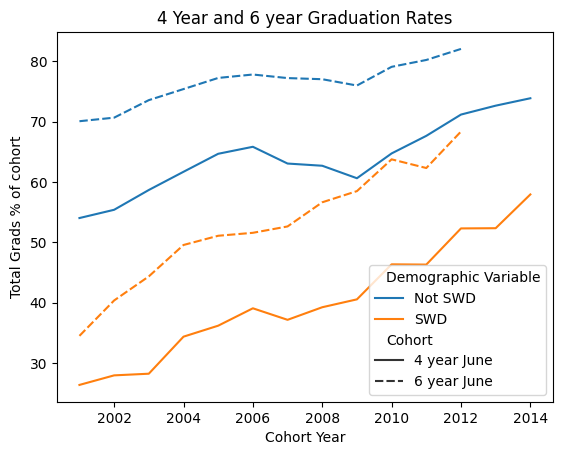

In [54]:
#plot to see changes over time in graduation rates for student with and without diabilies

b = sns.lineplot(data=Ch, x="Cohort Year", y="Total Grads % of cohort", hue="Demographic Variable",style="Cohort")
b.set_title('4 Year and 6 year Graduation Rates')

In [55]:
dfresults = df.groupby(['Cohort','Demographic Variable']).agg({'Total Grads % of cohort':'mean','Total Cohort #':'sum', 'Class Size':'mean'})
dfresults

Total Grads % of cohort  Total Cohort #  \
Cohort      Demographic Variable                                            
4 year June Not SWD                             65.267574          806704   
            SWD                                 42.660469          123822   
6 year June Not SWD                             77.127813          696259   
            SWD                                 55.223667           99763   

                                  Class Size  
Cohort      Demographic Variable              
4 year June Not SWD               168.978634  
            SWD                    27.147994  
6 year June Not SWD               177.662414  
            SWD                    26.861335

In [56]:
Final = df.drop(df[df.Cohort.isin(['4 year June'])].index).copy()
Final = Final.groupby(['Demographic Variable','Cohort Year'],as_index= False).agg({'Total Grads % of cohort':'mean','Total Cohort #':'sum','Class Size':'mean'}).copy()

Final

,Demographic Variable,Cohort Year,Total Grads % of cohort,Total Cohort #,Class Size
0,Not SWD,2001,70.058065,50715,272.661290
1,Not SWD,2002,70.648780,54954,268.068293
2,Not SWD,2003,73.551477,54614,230.438819
3,Not SWD,2004,75.384015,57017,211.959108
4,Not SWD,2005,77.228155,59398,192.226537
5,Not SWD,2006,77.796000,62083,177.380000
6,Not SWD,2007,77.204494,61837,173.699438
7,Not SWD,2008,77.017473,61294,164.768817
8,Not SWD,2009,75.972610,61394,158.640827
9,Not SWD,2010,79.069734,59049,142.975787


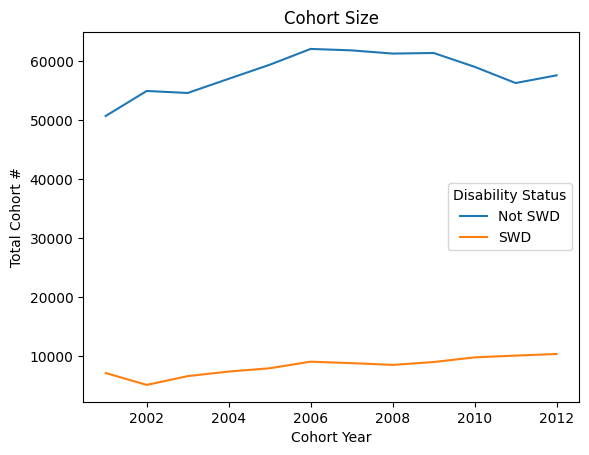

In [57]:

Size = sns.lineplot(data=Final, x="Cohort Year", y="Total Cohort #", hue = "Demographic Variable")
Size.set_title('Cohort Size')

plt.legend(title='Disability Status')
plt.show(Size)

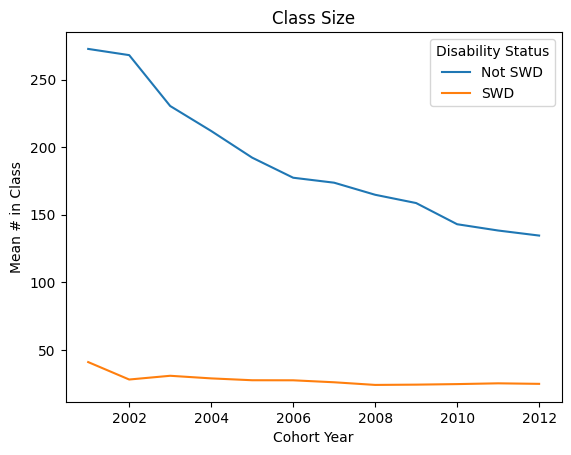

In [58]:

cl= sns.lineplot(data=Final, x="Cohort Year", y="Class Size", hue = "Demographic Variable")
cl.set_title('Class Size')
cl.set(ylabel = "Mean # in Class")
plt.legend(title='Disability Status')
plt.show(cl)

In [59]:
#creating data frame to compare first year with final year 6 year graduation rate
# changed year to categorical so I could make a bar chart
dfc = df.copy()
dfc['Cohort Year']= df['Cohort Year'].apply(str)
dfc = dfc[dfc['Cohort'].str.contains('6 year June')]
# selecting years of interest
values=["2012","2001"]
dfc = (dfc[dfc["Cohort Year"].isin(values)] )
dfc.head(25)

,Cohort Year,Cohort,Demographic Variable,Total Grads % of cohort,Total Cohort #,Class Size
1094,2012,6 year June,Not SWD,72.4,29,29
1145,2012,6 year June,SWD,58.3,12,12
2434,2012,6 year June,Not SWD,83.3,48,48
2445,2001,6 year June,Not SWD,87.7,57,57
2491,2012,6 year June,SWD,62.5,16,16
2502,2001,6 year June,SWD,57.1,7,7
3762,2012,6 year June,Not SWD,94.0,67,67
3773,2001,6 year June,Not SWD,77.6,49,49
3819,2012,6 year June,SWD,86.4,22,22
3830,2001,6 year June,SWD,66.7,12,12


In [60]:
dfc.dtypes

Cohort Year                 object
Cohort                      object
Demographic Variable        object
Total Grads % of cohort    float64
Total Cohort #               int64
Class Size                   int64
dtype: object

In [61]:
#Results C omparing 2012 and 2021 6 year graduation Rate
Results02_12 = dfc.groupby(['Cohort Year','Demographic Variable'], as_index=  False).agg({'Total Cohort #':'sum','Total Grads % of cohort':'mean', 'Class Size': 'mean'})
Results02_12

,Cohort Year,Demographic Variable,Total Cohort #,Total Grads % of cohort,Class Size
0,2001,Not SWD,50715,70.058065,272.661290
1,2001,SWD,7133,34.497701,40.994253
2,2012,Not SWD,57605,82.035981,134.591121
3,2012,SWD,10355,68.351202,24.891827


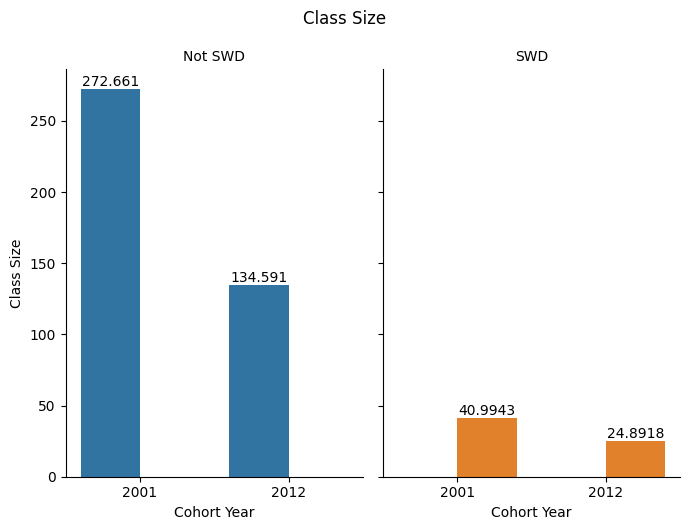

In [94]:
#Plot Size of Cohort- In separate subplot
R = Results02_12.rename(columns={'Demographic Variable': 'Disability Status'})

CP = sns.catplot(R, kind="bar",x="Cohort Year", y="Class Size", col="Disability Status", hue = 'Disability Status' ,aspect= .7)


CP.set_titles("{col_name}")
CP.fig.suptitle("Class Size", y=1.05)

for CP in CP.axes.ravel():
  for c in CP.containers:
    CP.bar_label(c)




In [63]:
R.shape

(4, 5)

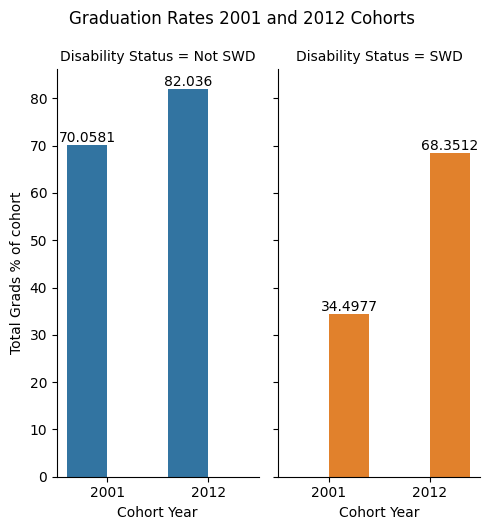

In [28]:
#Plot Graduation 2001 abd 2012
pc = sns.catplot(R, kind="bar",x="Cohort Year", y="Total Grads % of cohort", col="Disability Status", aspect= .5, hue="Disability Status")
pc.fig.suptitle("Graduation Rates 2001 and 2012 Cohorts ", y=1.05)
for pc in pc.axes.ravel():
  for c in pc.containers:
    pc.bar_label(c)

In [91]:
# Analyses to see if disability status and year predicted graduation rate and cohort sizes
import statsmodels.api as sm
from statsmodels.formula.api import ols
centered=df.copy()
centered['Cohort Year']= centered['Cohort Year'].apply(pd.to_numeric)
centered.dtypes


Cohort Year                  int64
Cohort                      object
Demographic Variable        object
Total Grads % of cohort    float64
Total Cohort #               int64
Class Size                   int64
dtype: object

In [92]:


center_function = lambda x: x - x.mean()
data = pd.DataFrame({ 'x': centered['Demographic Variable'], 'y': centered['Total Grads % of cohort'], 'z':centered['Cohort Year'], 'f':centered['Total Cohort #']}).copy()
centered['Cohort Year'] = center_function(Final['Cohort Year'])
model = ols("y ~ x*z", data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     1766.
Date:                Sat, 06 Jan 2024   Prob (F-statistic):               0.00
Time:                        07:57:47   Log-Likelihood:                -76860.
No. Observations:               16968   AIC:                         1.537e+05
Df Residuals:                   16964   BIC:                         1.538e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1616.9214    133.409    -12.120      0.0

Conclusion: Graduation rates for SWD are lower than for students without disabilities. The graduation rates have increased for both groups of studnets. The graduation rate icreased conitinously for SWD but appears to have leveled off for non diabled students. This is especially evident in the 6 year graduation rates.

The number of students in each school's cohort has decreased  but the ovarall number of students in  NYC  has increased due to the opening of new schools.